In [108]:
import sys
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def imshow(tit, image):
    plt.figure(figsize=(12, 8))
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title(tit)
    plt.axis('off')    
    plt.show()

In [3]:
DIR = './src/'

## 공간 필터링

- 인접 화소들의 값을 참조하여 화소의 값을 변경

### 수직, 수평 필터링

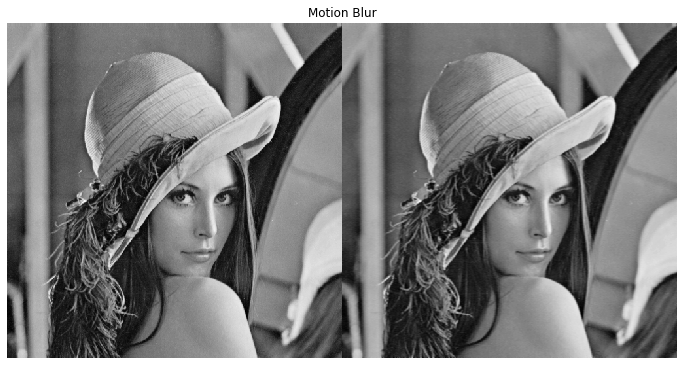

In [4]:
src = cv2.imread(DIR + 'lenna.bmp',0)

dst = np.zeros(src.shape, dtype = np.uint8) # 넘파이는 기본적으로 실수 타입이므로 uint8로 타입 변경
dst = src.copy()

for r in range(1, src.shape[0]-1): # 첫번째 픽셀과 마지막 픽셀은 주변 픽셀이 없음
    for c in range(1, src.shape[1]-1):
        # uint8 타입의 연산이므로 int 연산과 결과가 다름 -> 하나를 int 타입으로 변경해주면 우리가 생각하는 더하기 연산 값 나옴!!
        sum = (int(src[r,c-1]) + src[r,c] + src[r,c+1])/3 # overflow 방지하기 위해 나누기 3 해주기
        dst[r,c] = sum

# 수평에 있는 픽셀끼리 평균값을 내면 좌우 모션 블러링 효과 발생        
imshow("Motion Blur",np.hstack((src,dst)))

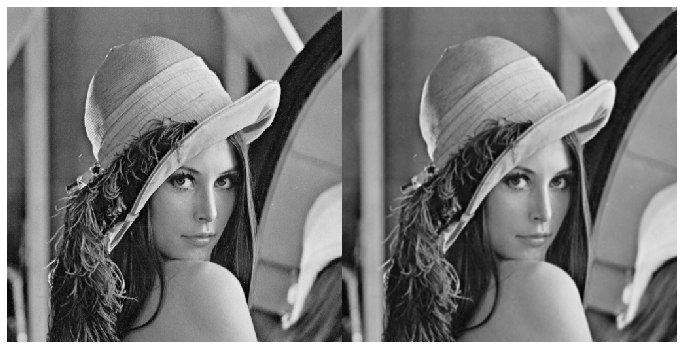

In [5]:
src = cv2.imread(DIR + 'lenna.bmp',0)

dst = np.zeros(src.shape, dtype = np.uint8) 
dst = src.copy()

for r in range(1, src.shape[0]-1):
    for c in range(1, src.shape[1]-1):
        sum = 0 # int 타입
        for r1 in range(-1,2): # -1, 0, 1
            for c1 in range(-1,2):
                sum += src[r+r1,c+c1] # sum이 기본적으로 int 타입이라 더하기 연산할때 overflow 발생하지 않음
        dst[r,c] = sum / 9
     
imshow("",np.hstack((src,dst)))

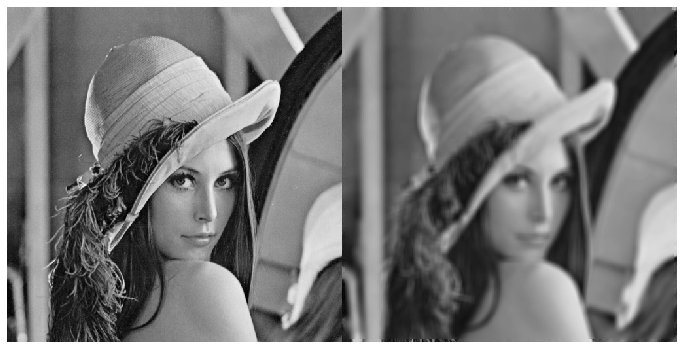

In [6]:
src = cv2.imread(DIR + 'lenna.bmp',0)

dst = np.zeros(src.shape, dtype = np.uint8) 
dst = src.copy()

for r in range(5, src.shape[0]-5): 
    for c in range(5, src.shape[1]-5):
        sum = 0 # int 타입
        for r1 in range(-5,6): # 11X11
            for c1 in range(-5,6):
                sum += src[r+r1,c+c1] # sum이 기본적으로 int 타입이라 더하기 연산할때 overflow 발생하지 않음
        dst[r,c] = sum / (11*11)
        
        
imshow("",np.hstack((src,dst)))

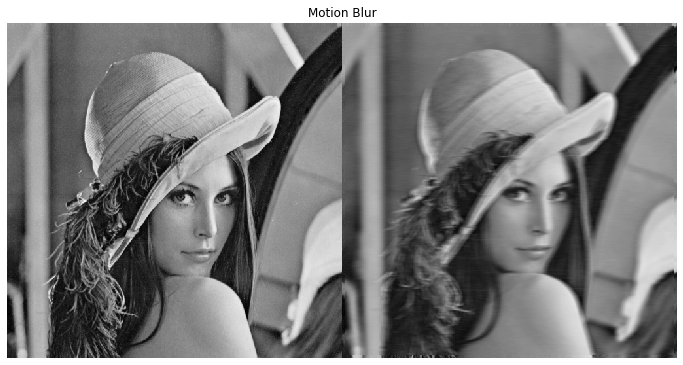

In [7]:
src = cv2.imread(DIR + 'lenna.bmp',0)

dst = np.zeros(src.shape, dtype = np.uint8) 
dst = src.copy()

for r in range(5, src.shape[0]-5): 
    for c in range(5, src.shape[1]-5):
        sum = 0 # int 타입
        for c1 in range(-5,6):
            sum += src[r+r1,c+c1]
        dst[r,c] = sum / 11
        
        
imshow("Motion Blur",np.hstack((src,dst)))

<class 'numpy.ndarray'>


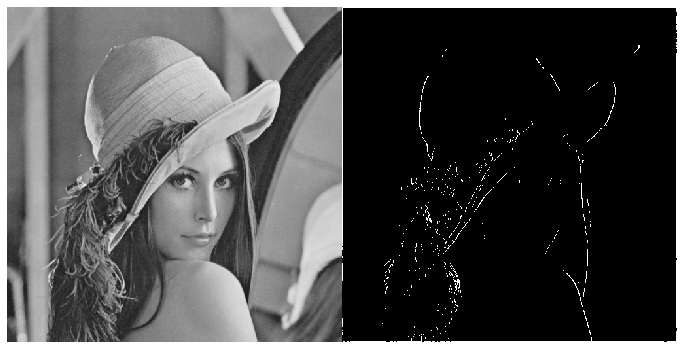

In [10]:
src = cv2.imread(DIR + 'lenna.bmp',0)

dst = np.zeros(src.shape, dtype = np.uint8) 
dst = src.copy()

for r in range(1, src.shape[0]-1): 
    for c in range(1, src.shape[1]-1):
        out = np.abs(int(src[r,c]) - src[r,c+1]) # 0~ 255
        dst[r,c] = out

dst = (dst >50)*255 #변화가 큰값들 이진화
dst = dst.astype('uint8')
print(type(dst))

imshow("",np.hstack((src,dst)))
# cv2.imshow('dst', np.hstack((src,dst)))
# cv2.waitKey(0)
# cv2.destroyAllWindows()

<class 'numpy.ndarray'>


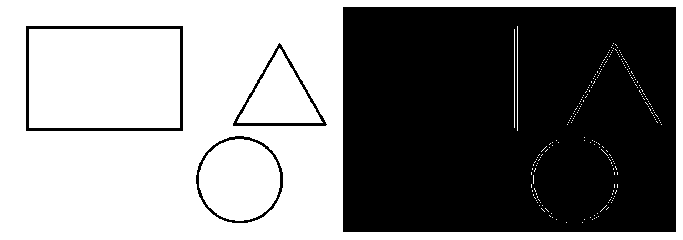

In [12]:
src = cv2.imread(DIR + 'box.png',0)

dst = np.zeros(src.shape, dtype = np.uint8) 
dst = src.copy()

for r in range(1, src.shape[0]-1): 
    for c in range(1, src.shape[1]-1):
        out = np.abs(int(src[r,c]) - src[r,c+1]) # 0~ 255
        dst[r,c] = out

dst = (dst >50)*255
dst = dst.astype('uint8')
print(type(dst))

imshow("",np.hstack((src,dst)))

<class 'numpy.ndarray'>


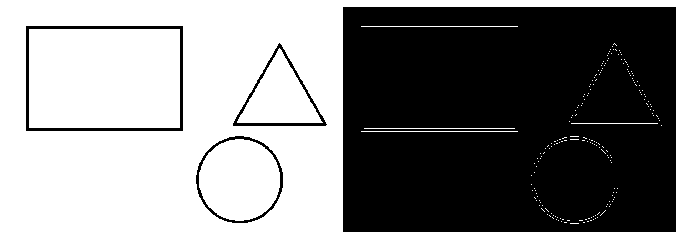

In [13]:
src = cv2.imread(DIR + 'box.png',0)

dst = np.zeros(src.shape, dtype = np.uint8) 
dst = src.copy()

for r in range(1, src.shape[0]-1): 
    for c in range(1, src.shape[1]-1):
        out = np.abs(int(src[r,c]) - src[r-1,c]) # 0~ 255
        dst[r,c] = out

dst = (dst >50)*255
dst = dst.astype('uint8')
print(type(dst))

imshow("",np.hstack((src,dst)))

<class 'numpy.ndarray'>


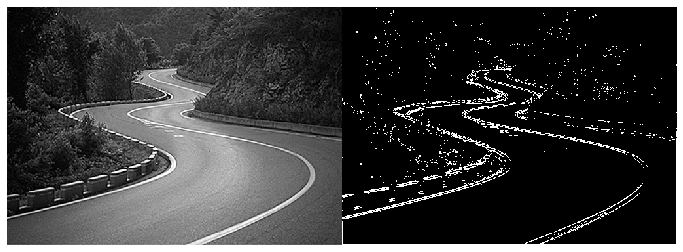

In [19]:
src = cv2.imread(DIR + 'road1.jpg',0)

dst = np.zeros(src.shape, dtype = np.uint8) 
dst = src.copy()

for r in range(1, src.shape[0]-1): 
    for c in range(1, src.shape[1]-1):
        out = np.abs(int(src[r,c]) - src[r-1,c]) # 0~ 255
        dst[r,c] = out

dst = (dst >45)*255
dst = dst.astype('uint8')
print(type(dst))

imshow("",np.hstack((src,dst)))

<class 'numpy.ndarray'>


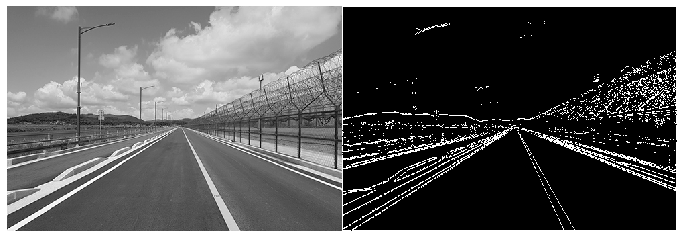

In [17]:
src = cv2.imread(DIR + 'road2.jpg',0)

dst = np.zeros(src.shape, dtype = np.uint8) 
dst = src.copy()

for r in range(1, src.shape[0]-1): 
    for c in range(1, src.shape[1]-1):
        out = np.abs(int(src[r,c]) - src[r-1,c]) # 0~ 255
        dst[r,c] = out

dst = (dst >40)*255
dst = dst.astype('uint8')
print(type(dst))

imshow("",np.hstack((src,dst)))

uint8


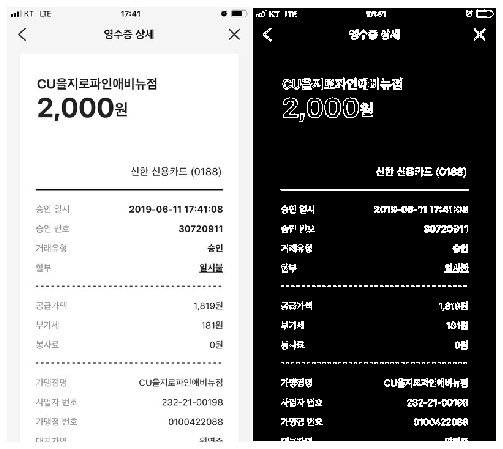

In [73]:
src = cv2.imread(DIR + 'ocr.jpg',0)

dst = np.zeros(src.shape, dtype = np.uint8) 
dst = src.copy()

for r in range(1, src.shape[0]-1): 
    for c in range(1, src.shape[1]-1):
        out = np.abs(int(src[r,c]) - src[r-1,c]) # 수직 엣지
        out2 = np.abs(int(src[r,c]) - src[r,c-1]) # 수평 엣지
        dst[r,c] = (out + out2) / 2

dst = (dst >20)*255
dst = dst.astype('uint8')
print(dst.dtype)

imshow("",np.hstack((src,dst)))

uint8


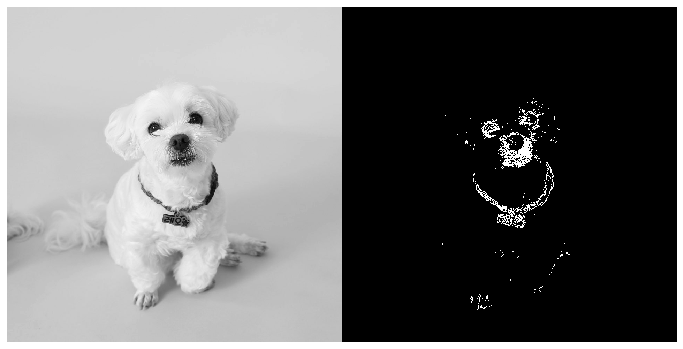

In [77]:
src = cv2.imread(DIR + 'leo1.jpg',0)

dst = np.zeros(src.shape, dtype = np.uint8) 
dst = src.copy()

for r in range(1, src.shape[0]-1): 
    for c in range(1, src.shape[1]-1):
        out = np.abs(int(src[r,c]) - src[r-1,c]) # 수직 엣지
        out2 = np.abs(int(src[r,c]) - src[r,c-1]) # 수평 엣지
        dst[r,c] = (out + out2) / 2

dst = (dst >10)*255
dst = dst.astype('uint8')
print(dst.dtype)

imshow("",np.hstack((src,dst)))

### 컨볼루션

In [25]:
mask = np.array([
    [1/9.0, 1/9.0, 1/9.0],
    [1/9.0, 1/9.0, 1/9.0],
    [1/9.0, 1/9.0, 1/9.0],
])

In [26]:
mask

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

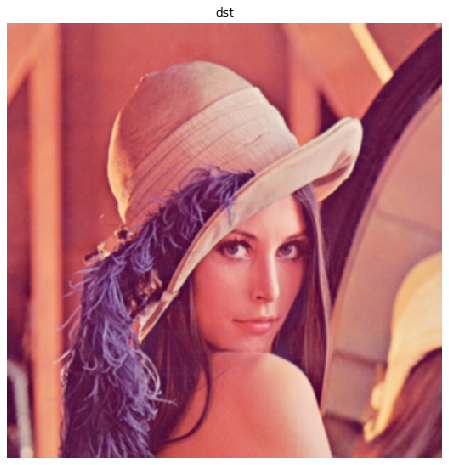

In [27]:
src = cv2.imread(DIR + 'lenna.bmp')
dst = cv2.filter2D(src, -1, mask)

imshow('dst', dst)

In [29]:
mask = np.array([
    [0,0,0],
    [0,1,-1], #현재 값에서 오른쪽에 있는 값을 빼기
    [0,0,0],
])

uint8


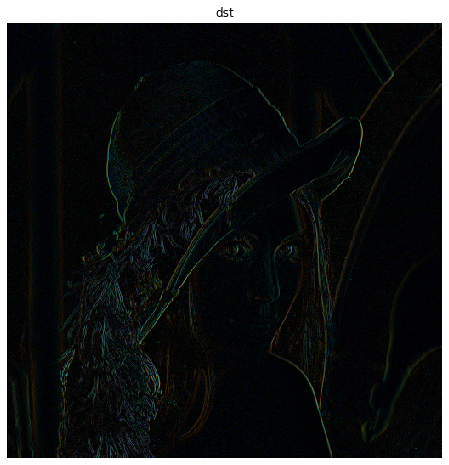

In [34]:
src = cv2.imread(DIR + 'lenna.bmp')
src = src.astype('float') # 원본 이미지가 uint8이므로 필터링할 때 값이 다 적용되지 않을 수 있으므로(예: 음수) 타입을 확장해줌
dst = cv2.filter2D(src, -1, mask)
dst = cv2.convertScaleAbs(dst) # 음수값이 발생하지 않도록
print(dst.dtype)
imshow('dst', dst)

### 평균값 필터링

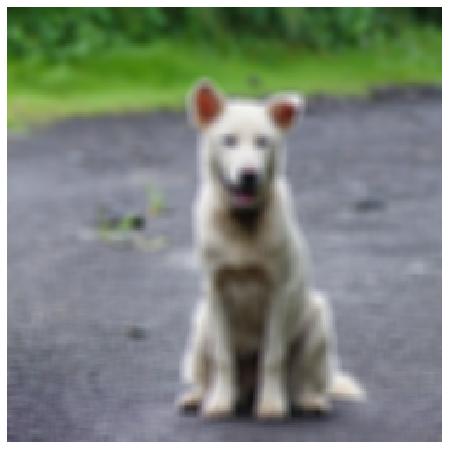

In [35]:
img = cv2.imread(DIR + 'dog.bmp')
dst = cv2.blur(img,(7,7))

imshow("",dst)

### 가우시안 필터링

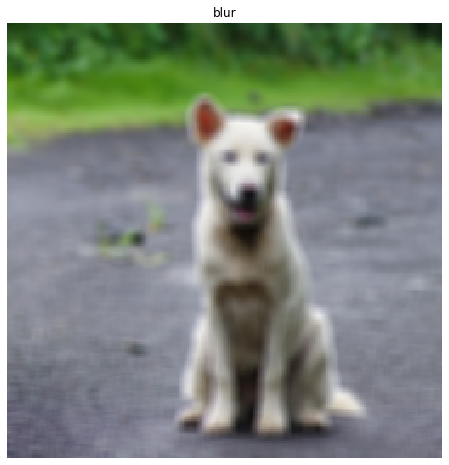

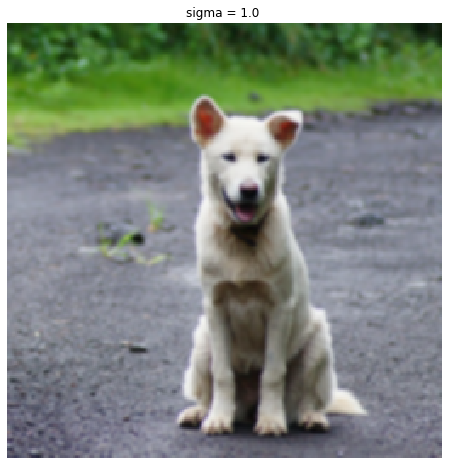

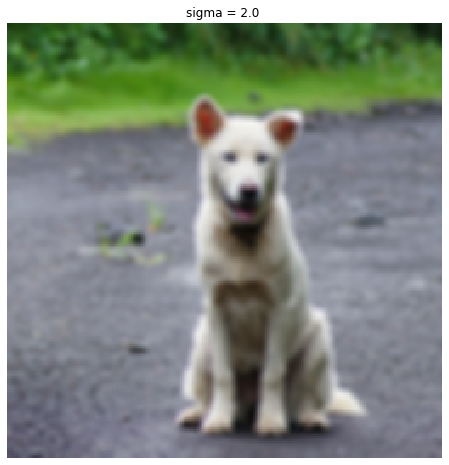

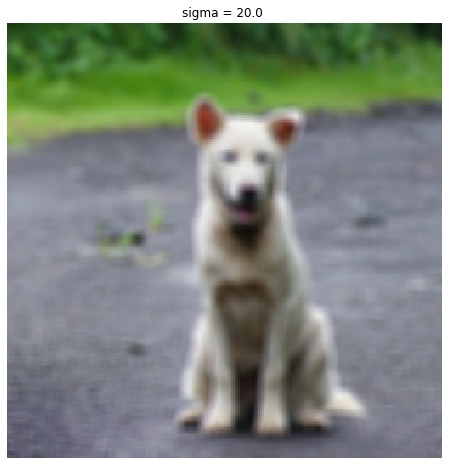

In [41]:
img = cv2.imread(DIR + 'dog.bmp')
dst = cv2.blur(img,(7,7))
imshow("blur",dst)

dst2 = cv2.GaussianBlur(img, (7,7), 1.0)
imshow("sigma = 1.0 ",dst2)

dst3 = cv2.GaussianBlur(img, (7,7), 2.0)
imshow("sigma = 2.0 ",dst3)

dst4 = cv2.GaussianBlur(img, (7,7), 20.0)
imshow("sigma = 20.0 ",dst4)

In [43]:
img = cv2.imread(DIR + 'rose.bmp')

sig = [1,2,5,7,9]
for s in sig:
    dst = cv2.GaussianBlur(img,(15,15),s)
    cv2.imshow("dst",dst)
    cv2.waitKey()
    
cv2.destroyAllWindows()

### embossing

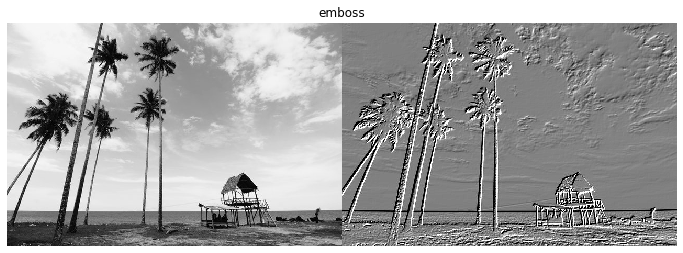

In [51]:
src = cv2.imread(DIR + 'test1.jpg',0)

# 좌측 상단은 빼고 우측 하단은 더하기
emboss = np.array([[-1,-1,0],
                  [-1,0,1],
                  [0,1,1]], np.float32)

dst = cv2.filter2D(src, -1,emboss, delta=128)
imshow('emboss', np.hstack((src,dst)))

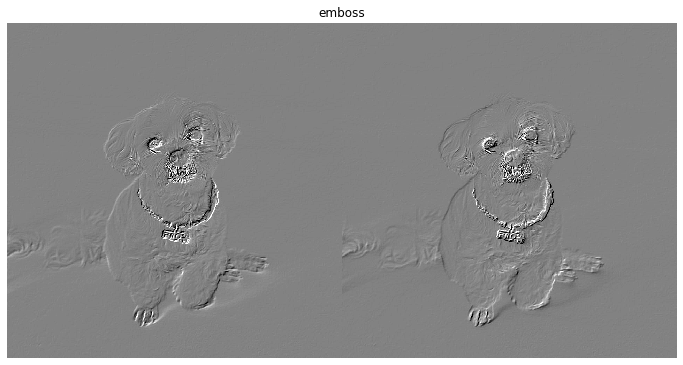

In [81]:
src = cv2.imread(DIR + 'leo1.jpg',0)


emboss1 = np.array([[-1,-1,0],
                  [-1,0,1],
                  [0,1,1]], np.float32)
emboss2 = np.array([[1,1,0],
                  [1,0,-1],
                  [0,-1,-1]], np.float32)

dst1 = cv2.filter2D(src, -1,emboss1, delta=130) # 좌측 상단 빼기
dst2 = cv2.filter2D(src, -1,emboss2, delta=130) # 우측 하단 빼기
imshow('emboss', np.hstack((dst1,dst2)))

### 샤프닝

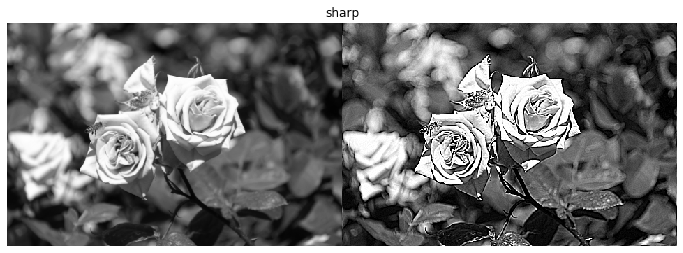

In [99]:
src = cv2.imread(DIR + 'rose.bmp',0)

sharp = np.array([[-1,-1,-1],
                 [-1,9,-1],
                 [-1,-1,-1]], np.float32)

dst = cv2.filter2D(src, -1,sharp)
imshow('sharp', np.hstack((src,dst)))

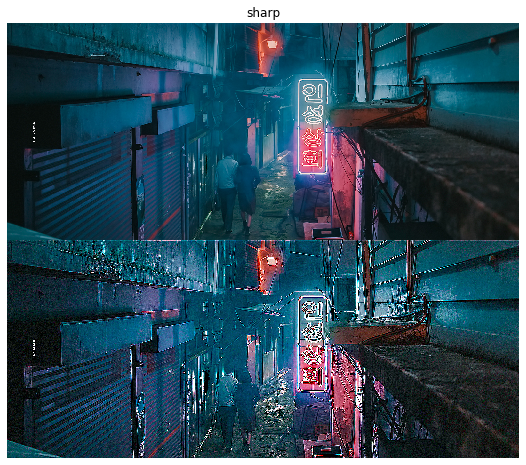

In [59]:
src = cv2.imread(DIR + 'neon.jpg')

sharp = np.array([[-1,-1,-1],
                 [-1,9,-1],
                 [-1,-1,-1]], np.float32)

dst = cv2.filter2D(src, -1,sharp)
imshow('sharp', np.vstack((src,dst)))

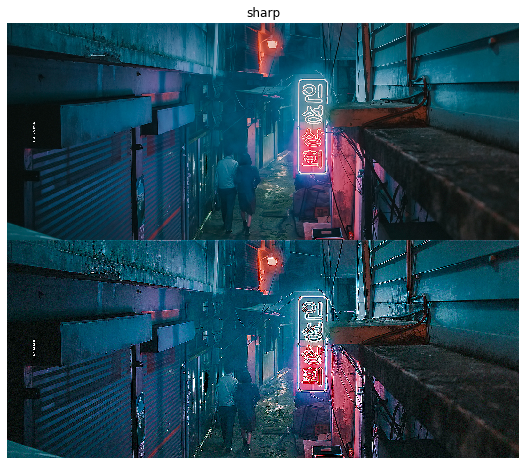

In [60]:
src = cv2.imread(DIR + 'neon.jpg')

sharp = np.array([[0,-1,0],
                 [-1,5,-1],
                 [0,-1,0]], np.float32)

dst = cv2.filter2D(src, -1,sharp)
imshow('sharp', np.vstack((src,dst)))

### 에지 검출

#### 1차 미분

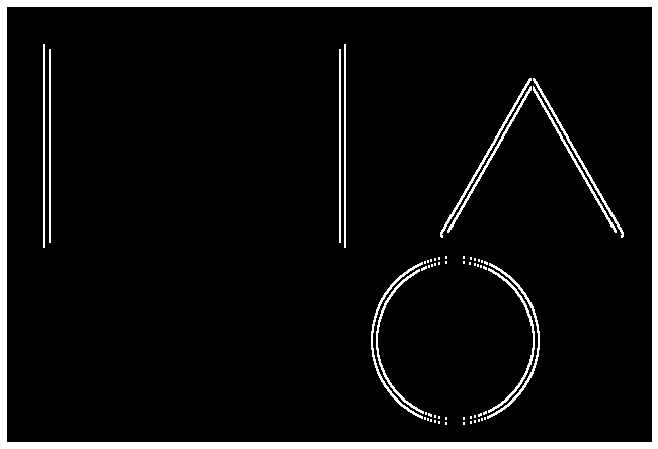

In [78]:
src = cv2.imread(DIR + 'box.png',0)
img_sobel_x = cv2.Sobel(src, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)
imshow("", img_sobel_x)

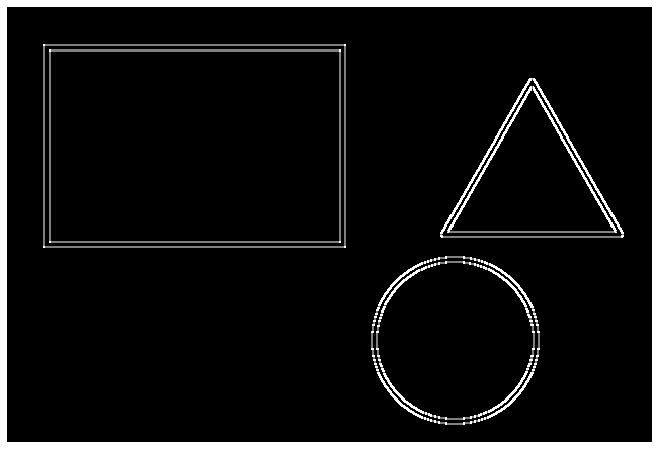

In [79]:
src = cv2.imread(DIR + 'box.png',0)
img_sobel_x = cv2.Sobel(src, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

img_sobel_y = cv2.Sobel(src, cv2.CV_64F, 0,1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

dst = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5 , 0.0)

imshow('',dst)

- cv2.Sobel(그레이스케일 이미지, 정밀도, x방향 미분, y방향 미분, 커널, 배율, 델타, 픽셀 외삽법)

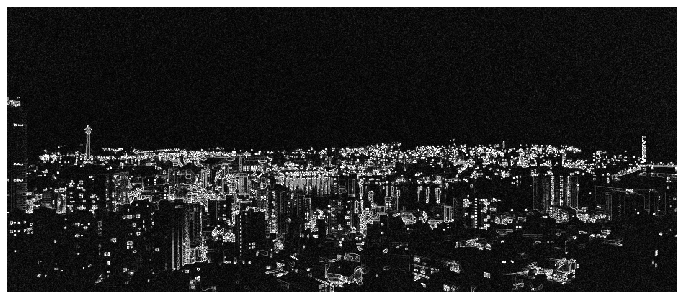

In [84]:
src = cv2.imread(DIR + 'city.jpg',0)
img_sobel_x = cv2.Sobel(src, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

img_sobel_y = cv2.Sobel(src, cv2.CV_64F, 0,1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

dst = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5 , 0.0)

imshow('',dst)

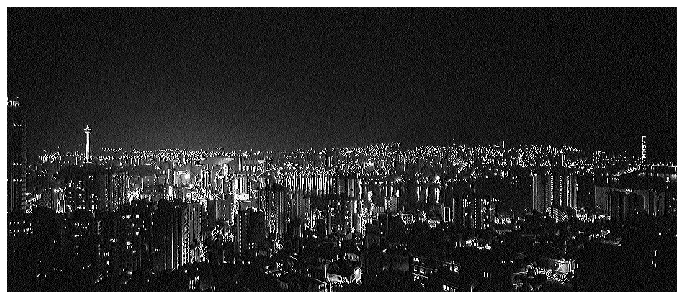

In [94]:
src = cv2.imread(DIR + 'city.jpg',0)
sobel_ = np.array([[-1,0,1],
                 [-2,1,2],
                 [-1,0,1]], np.float32)

dst = cv2.filter2D(src, -1,sobel_)
imshow('', dst)

#### 2차 미분

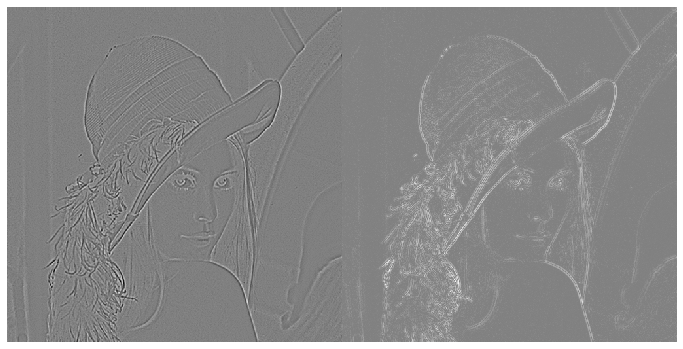

In [102]:
src = cv2.imread(DIR + 'lenna.bmp', cv2.IMREAD_GRAYSCALE)
src = cv2.GaussianBlur(src,(3,3), 0)
laplacian = cv2.Laplacian(src, cv2.CV_32F)
dst = cv2.convertScaleAbs(laplacian)

imshow('', np.hstack((laplacian, dst)))

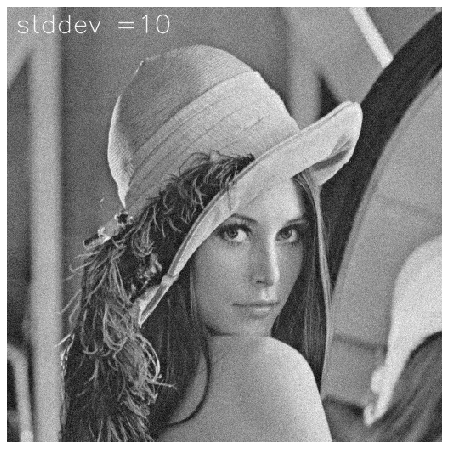

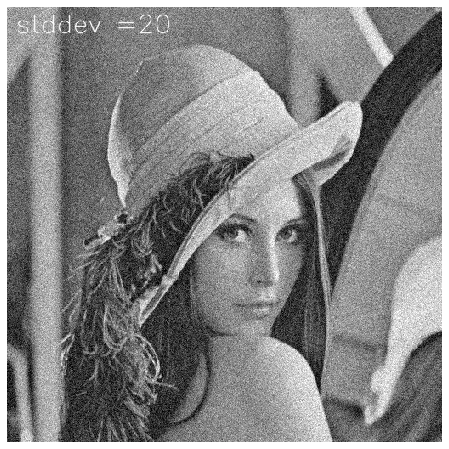

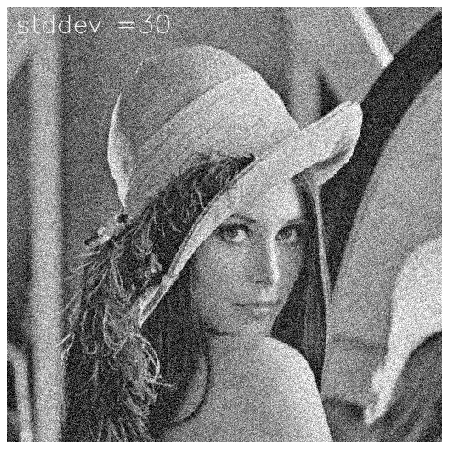

In [105]:
src = cv2.imread(DIR + 'lenna.bmp', cv2.IMREAD_GRAYSCALE)

for stddev in [10,20,30]:
    noise = np.zeros(src.shape, np.int32)
    cv2.randn(noise, 0 , stddev)
    
    dst = cv2.add(src, noise, dtype = cv2.CV_8UC1)
    desc = 'stddev =%d' % stddev
    cv2.putText(dst, desc, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0,255,1,cv2.LINE_AA)
    imshow('',dst)

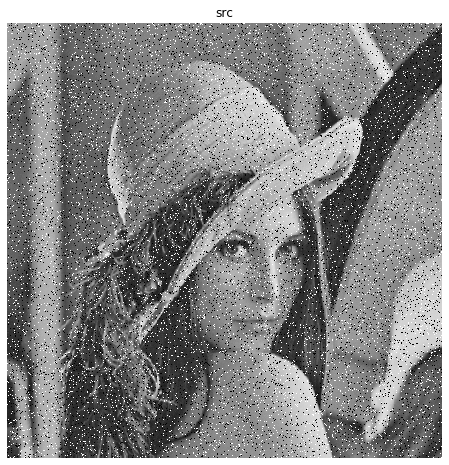

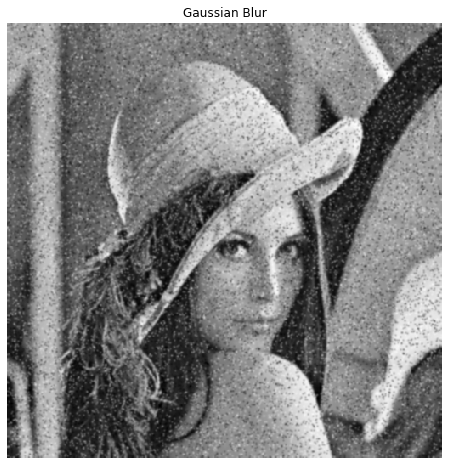

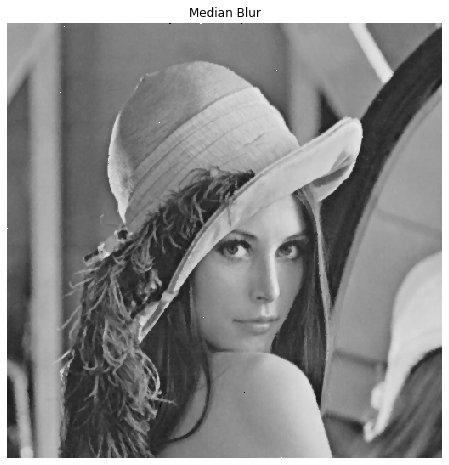

In [111]:
src = cv2.imread(DIR + 'lenna.bmp', cv2.IMREAD_GRAYSCALE)

for i in range(0, int(src.size/10)):
    x = random.randint(0, src.shape[1]-1)
    y = random.randint(0, src.shape[0]-1)
    src[x,y] = (i%2)*255 # 0 혹은 255의 노이즈 값 추가

dst1 = cv2.GaussianBlur(src, (7,7),1)
dst2 = cv2.medianBlur(src, 3)

imshow('src',src)
imshow('Gaussian Blur',dst1)
imshow('Median Blur',dst2)

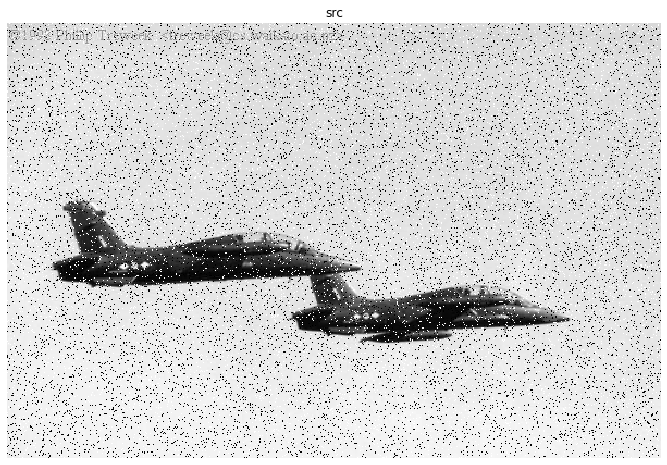

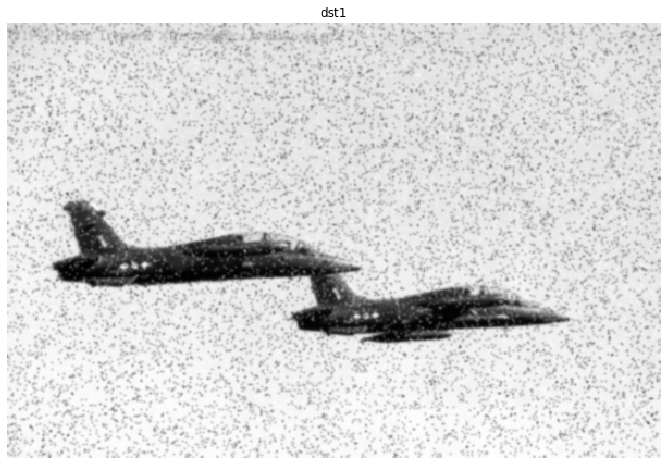

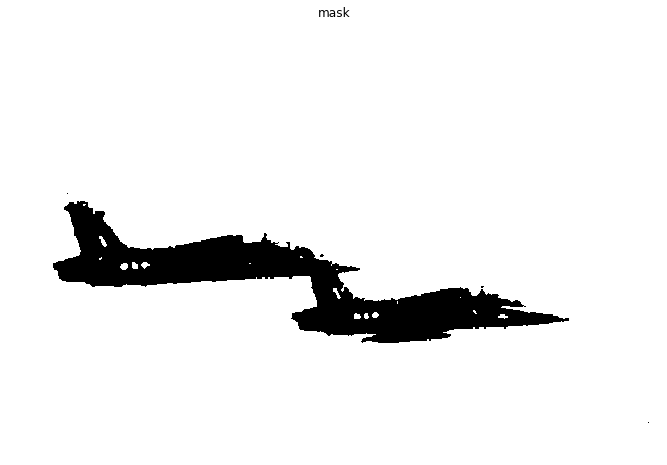

In [121]:
src = cv2.imread(DIR + '0001.jpg', cv2.IMREAD_GRAYSCALE)

for i in range(0, int(src.size/10)):
    x = random.randint(0, src.shape[1]-1)
    y = random.randint(0, src.shape[0]-1)
    src[y,x] = (i%2)*255 # 0 혹은 255의 노이즈 값 추가

dst1 = cv2.GaussianBlur(src, (7,7),1)
dst2 = cv2.medianBlur(src, 3)

ret, mask = cv2.threshold(dst1, 128,255, cv2.THRESH_BINARY)

imshow('src',src)
imshow('dst1',dst1)
imshow('mask',mask)